In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv("C:/Users/lenovo/Downloads/Live-Time-Series-main/Live-Time-Series-main/airline_passengers.csv")
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.dropna(axis=0,inplace=True)

In [5]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [6]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [7]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [9]:
df_airline.set_index('Month',inplace=True)

In [10]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

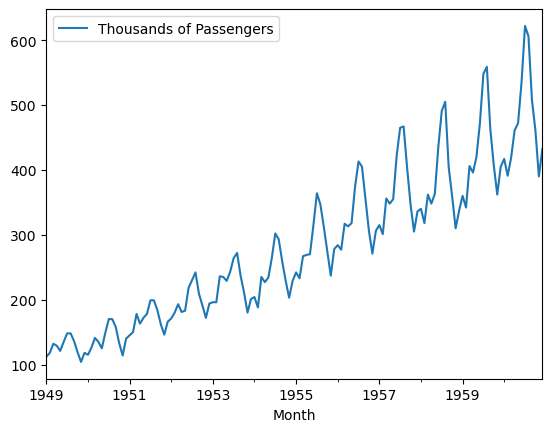

In [11]:
df_airline.plot()

In [12]:
## Inference: seasonal upward trend

In [13]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root")

In [23]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060587
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root


In [24]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)


In [25]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699848
p- value: 0.054213290283827514
weak evidence against null hypothesis, time series has a unit root


In [26]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [27]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246848
p- value: 2.732891850014359e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [28]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [29]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

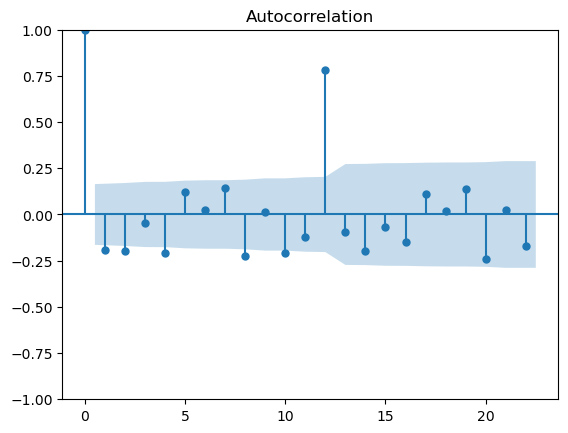

In [31]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


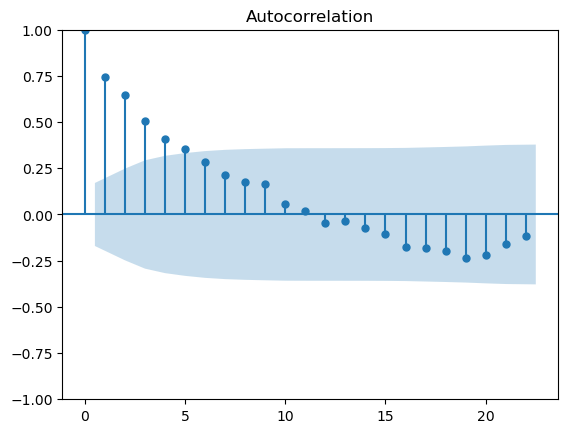

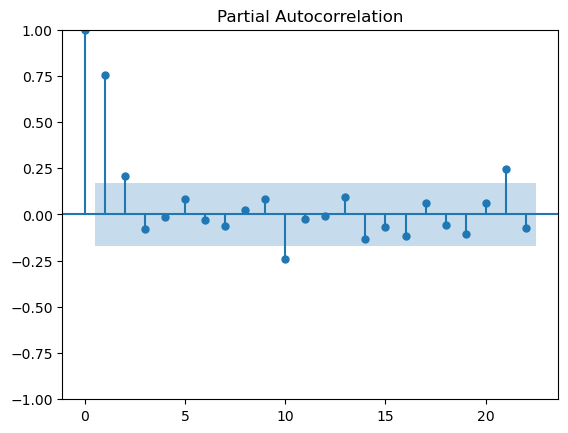

In [32]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())#qvalue
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())#pvalue

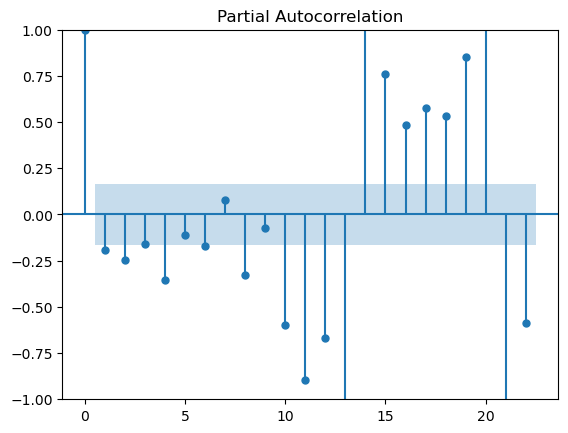

In [33]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

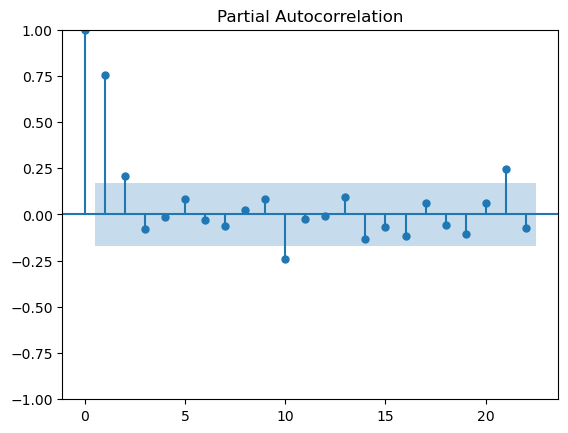

In [34]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [35]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [54]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [55]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [56]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [57]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [58]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [69]:
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(14,2,12))

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [71]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(14, 2, 12)   Log Likelihood                -306.049
Date:                     Mon, 16 Jan 2023   AIC                            666.097
Time:                             21:25:18   BIC                            731.079
Sample:                         01-01-1949   HQIC                           692.186
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7417      5.580     -0.133      0.894     -11.679      10.196
ar.L2         -0.2026      9.035     -0.022      0.982     -17.911      17.506
ar.L3         -0.2549      9.058     -0.028      0.978     -18.008      17.498
ar.L4         -0.2469      8.970     -0.028      0.978     -17.827      17.334
ar.L5         -0.2915      8.844     -0.033      0.974     -17.626      17.043
ar.L6         -0.1971      8.952     -0.022      0.982     -17.743      17.349
ar.L7         -0.2634      8.540     -0.031      0.975     -17.001      16.474
ar.L8         -0.3338      8.546     -0.039      0.969     -17.083      16.416
ar.L9         -0.2617      8.967     -0.029      0.977     -17.837      17.313
ar.L10        -0.2968      8.931     -0.033      0.973     -17.802      17.209
ar.L11        -0.1215      9.069     -0.013      0.989     -17.896      17.653
ar.L12         0.5781      8.256      0.070      0.944     -15.603      16.759
ar.L13         0.5039      3.773      0.134      0.894      -6.891       7.899
ar.L14        -0.0673      0.489     -0.138      0.890      -1.025       0.891
ma.L1         -0.4302      5.609     -0.077      0.939     -11.424      10.564
ma.L2         -0.5972      2.734     -0.218      0.827      -5.955       4.761
ma.L3         -0.0807      1.328     -0.061      0.952      -2.684       2.523
ma.L4          0.1334      1.991      0.067      0.947      -3.769       4.036
ma.L5          0.2006      1.060      0.189      0.850      -1.878       2.279
ma.L6         -0.2718      0.558     -0.487      0.626      -1.366       0.822
ma.L7          0.2251      1.145      0.197      0.844      -2.018       2.468
ma.L8         -0.2830      0.539     -0.525      0.599      -1.339       0.773
ma.L9          0.2499      1.407      0.178      0.859      -2.508       3.008
ma.L10        -0.1054      0.709     -0.149      0.882      -1.496       1.285
ma.L11        -0.3110      0.749     -0.416      0.678      -1.778       1.156
ma.L12         0.2992      1.863      0.161      0.872      -3.352       3.951
sigma2        73.4677     28.063      2.618      0.009      18.465     128.470
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.46
Prob(Q):                              0.80   Prob(JB):                         0.18
Heteroskedasticity (H):               2.14   Skew:                             0.50
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [74]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [75]:
pred

1956-01-01    283.902188
1956-02-01    280.434904
1956-03-01    291.166860
1956-04-01    303.329699
1956-05-01    301.676917
1956-06-01    344.713009
1956-07-01    394.056487
1956-08-01    369.479375
1956-09-01    343.818185
1956-10-01    304.883511
1956-11-01    272.433170
1956-12-01    303.272140
1957-01-01    318.154425
1957-02-01    305.091351
1957-03-01    317.782487
1957-04-01    326.541230
1957-05-01    332.011744
1957-06-01    376.188201
1957-07-01    419.295372
1957-08-01    398.050836
1957-09-01    369.280808
1957-10-01    335.483581
1957-11-01    306.902315
1957-12-01    332.380218
1958-01-01    348.731663
1958-02-01    333.492086
1958-03-01    341.924035
1958-04-01    352.890725
1958-05-01    361.374912
1958-06-01    407.445731
1958-07-01    445.155240
1958-08-01    425.837780
1958-09-01    395.715855
1958-10-01    365.889510
1958-11-01    340.991990
1958-12-01    362.558300
1959-01-01    378.221381
1959-02-01    362.085410
1959-03-01    366.496294
1959-04-01    379.384939


In [76]:

residuals

Month
1956-01-01      0.097812
1956-02-01     -3.434904
1956-03-01     25.833140
1956-04-01      9.670301
1956-05-01     16.323083
1956-06-01     29.286991
1956-07-01     18.943513
1956-08-01     35.520625
1956-09-01     11.181815
1956-10-01      1.116489
1956-11-01     -1.433170
1956-12-01      2.727860
1957-01-01     -3.154425
1957-02-01     -4.091351
1957-03-01     38.217513
1957-04-01     21.458770
1957-05-01     22.988256
1957-06-01     45.811799
1957-07-01     45.704628
1957-08-01     68.949164
1957-09-01     34.719192
1957-10-01     11.516419
1957-11-01     -1.902315
1957-12-01      3.619782
1958-01-01     -8.731663
1958-02-01    -15.492086
1958-03-01     20.075965
1958-04-01     -4.890725
1958-05-01      1.625088
1958-06-01     27.554269
1958-07-01     45.844760
1958-08-01     79.162220
1958-09-01      8.284145
1958-10-01     -6.889510
1958-11-01    -30.991990
1958-12-01    -25.558300
1959-01-01    -18.221381
1959-02-01    -20.085410
1959-03-01     39.503706
1959-04-01     16.6

<AxesSubplot:ylabel='Density'>

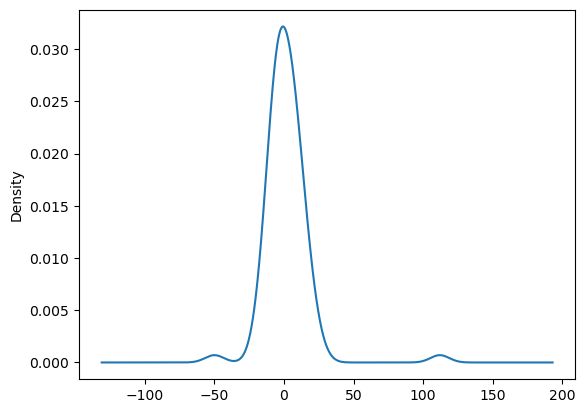

In [77]:
model_Arima_fit.resid.plot(kind='kde')

In [78]:
test_data['Predicted_ARIMA']=pred

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17756\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

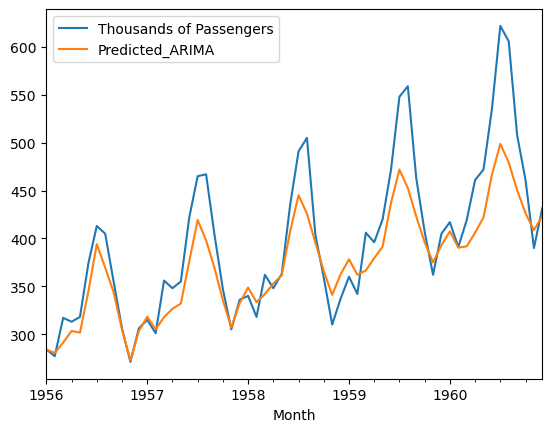

In [79]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [80]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [85]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [86]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.239
Date:                             Mon, 16 Jan 2023   AIC                            548.479
Time:                                     21:42:02   BIC                            568.969
Sample:                                 01-01-1949   HQIC                           556.636
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5915      0.948      0.624      0.532      -1.266       2.449
ar.L2          0.8321      0.231      3.597      0.000       0.379       1.286
ar.L3         -0.4467      0.903     -0.495      0.621      -2.216       1.322
ma.L1          0.1908      1.222      0.156      0.876      -2.204       2.585
ma.L2         -0.5297      1.317     -0.402      0.688      -3.111       2.052
ma.L3         -0.1001      0.403     -0.249      0.804      -0.889       0.689
ma.L4         -0.1285      0.363     -0.354      0.724      -0.841       0.584
ma.L5          0.2453      0.373      0.658      0.511      -0.485       0.976
sigma2        87.7132     88.019      0.997      0.319     -84.800     260.227
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.04   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [89]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

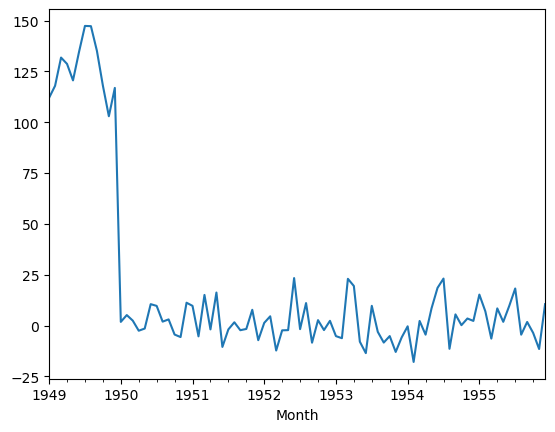

In [90]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

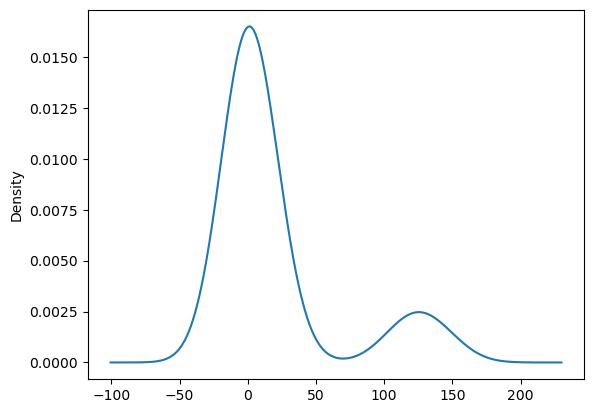

In [91]:
model_SARIMA_fit.resid.plot(kind='kde')

In [92]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17756\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [93]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,283.902188,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,280.434904,NaN
1956-03-01,317.0,40.0,47.0,50.0,291.166860,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,303.329699,NaN
1956-05-01,318.0,5.0,9.0,48.0,301.676917,NaN
1956-06-01,374.0,56.0,51.0,59.0,344.713009,NaN
1956-07-01,413.0,39.0,-17.0,49.0,394.056487,403.487149
1956-08-01,405.0,-8.0,-47.0,58.0,369.479375,385.174031
1956-09-01,355.0,-50.0,-42.0,43.0,343.818185,349.561117


<AxesSubplot:xlabel='Month'>

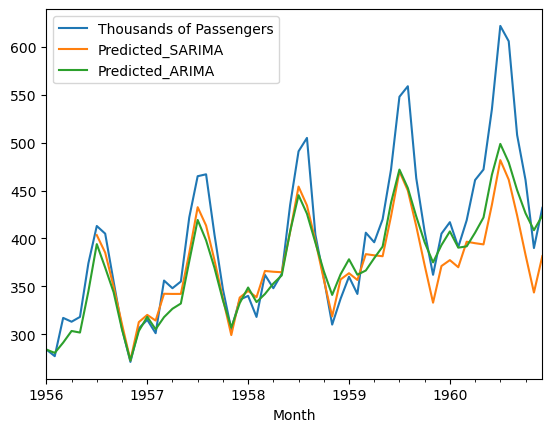

In [94]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()